In [ ]:
from google.colab import files, drive    # upload
import numpy as np                # mathematical calculations
from io import BytesIO            # reading files
from PIL import Image             # image processing library
import matplotlib.pyplot as plt   # plotting library
from mpl_toolkits import mplot3d  # 3D plots
import cv2 as cv2
from google.colab import files, drive    # upload


import time
from IPython import display
import random
import glob # find all files in a directory

Misty Wtaer Effect: Application of Image Stats

In [ ]:
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [ ]:
DIR = "/content/drive/MyDrive/Colab Notebooks/Image stats/rapid_3/"

In [ ]:
img_names = glob.glob(DIR+"*jpg") # Get all filenames that end with .jpg in DIR
img_names = img_names[:4] # SLice so we only use 4 imgs per burst
img_names

['/content/drive/MyDrive/Colab Notebooks/Image stats/rapid_3/0.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Image stats/rapid_3/3.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Image stats/rapid_3/1.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Image stats/rapid_3/2.jpg']

Write a loop to read in each image in your img_names and store in a dict?
0 -> np.array(img)

...

3 -> np.array(img)

imgs = {img[i]} = np.array(img)


In [ ]:
imgs = {}
for i, name in enumerate(img_names):
  p = Image.open(name)
  imgs[i] = np.array(p)

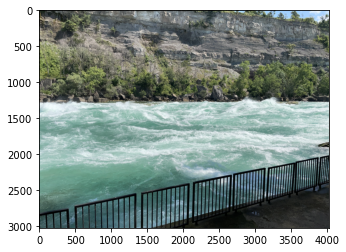

In [ ]:
plt.imshow(imgs[0])

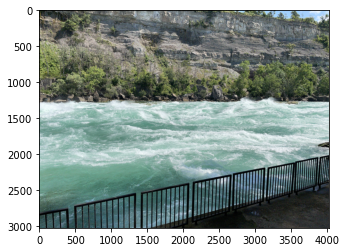

In [ ]:
plt.imshow(imgs[1])

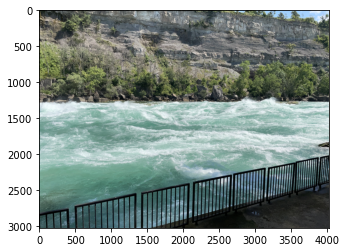

In [ ]:
plt.imshow(imgs[2])

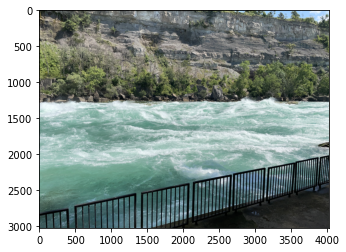

In [ ]:
plt.imshow(imgs[3])

Misty water strategy:
1. Per pixel average. 
2. Per pixel max.
2. per pixel min


In [ ]:
def greyscale(image):
  """
  Given a coloured rgb image, return the greyscale image.
  input:
    image - np array 3d
  output:
    grey - np array 2d
  """
  grey = 0.3*image[:,:,0] + 0.59*image[:,:,1] + 0.11*image[:,:,2]
  return grey

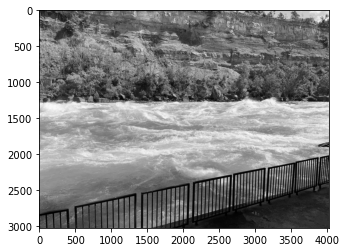

In [ ]:
g1 = greyscale(imgs[0])
plt.imshow(g1, cmap="gray")

In [ ]:
def per_px_mean(imgs):
  """
  Calculates a new grey scale image where each pixel is the mean of the input rgb images.
  Input:
    imgs - dict mapping int to 3D np array
  Output
    singe misty water image in 2D np array
  """
  grey = {}
  # Step 1: Find dimensions
  x, y, z = imgs[0].shape
  # Step 2: Create an empty misty water 2d np array
  new = np.zeros((x, y), dtype=np.float32)
  # Step 3: Convert to greyscale image
  for i in range(len(imgs)):
    grey[i] = greyscale(imgs[i])
  # Step 4: Loop over each pixel and calculate average of greyscale
  avg = 0
  for i in range(x):
    for s in range(y):
      avg = grey[0][i, s] + grey[1][i, s] + grey[2][i, s] + grey[3][i, s] 
      new[i, s] = avg/len(grey)
  return new/new.max()


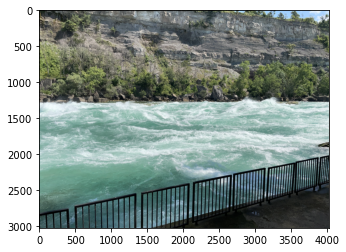

In [ ]:
plt.imshow(imgs[0])

(-0.5, 4031.5, 3023.5, -0.5)

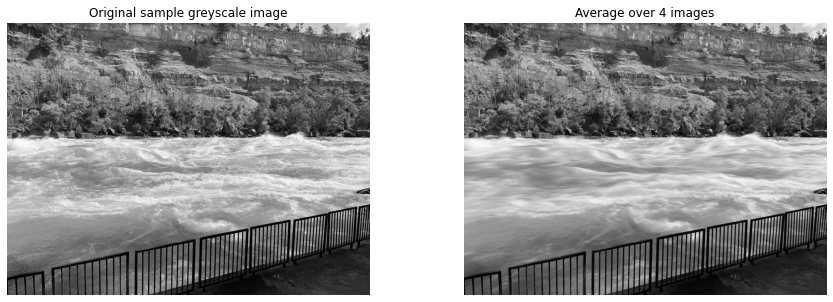

In [ ]:
gmean = per_px_mean(imgs)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[15, 5])
ax1.set_title("Original sample greyscale image")
ax2.set_title("Average over 4 images")

im1 = ax1.imshow(g1, cmap="gray")
im2 = ax2.imshow(gmean, cmap="gray")

ax1.axis('off')
ax2.axis('off')

1. What is the effect of the number of images on the misty water effect? For example, if I use 10 imgs vs 4 imgs, whatdo you expect the difference to be?

1A: More Misty Water Effect: Because we are combining different water scenes together.

2. Are the trees and cliffs affected by the Misty Water Effect?

2A: Not much because the position of the trees didn't move.









Homework:
Use min and max misty water effect meathods.


In [ ]:
imgs = {}
for i, name in enumerate(img_names):
  img = Image.open(name)
  imgs[i] = np.array(img)

In [ ]:
# Build a 4D matrix of input images
# Step 1: Make an empty 4D matrix of the proper dimension
a, b, c = imgs[0].shape
stack = np.zeros((a, b, c, len(img_names)), dtype=np.uint8)

# Step 2:
for i, name in enumerate(img_names):
  img = Image.open(name)
  stack[:,:,:,i] = np.array(img)

# Step 3: Make a empty matrix for collecting a stack of greyscale images
grey_stack = np.zeros((a, b, len(img_names)), dtype=np.float32)

# Step 4: Add in images to greyscale stack
for i in range(len(img_names)):
  grey_stack[:,:,i] = 0.3*stack[:,:,0, i] + 0.59*stack[:,:,1, i] + 0.11*stack[:,:,2, i]


In [ ]:
# 3D greyscale matrix
grey_stack.shape

(3024, 4032, 4)

In [ ]:
# 4D matrix dimensions
stack.shape

(3024, 4032, 3, 4)

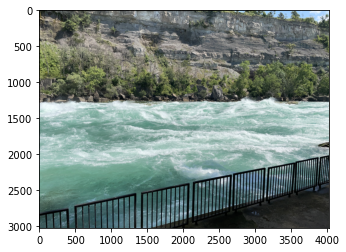

In [ ]:
# How to access image 4D stack
plt.imshow(stack[:,:,:,-1])



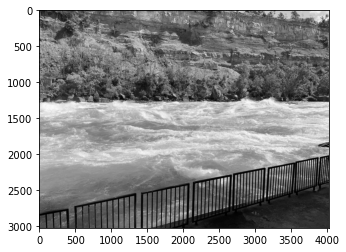

In [ ]:
# How to access image 3D  greyscale stack
plt.imshow(grey_stack[:,:,-1], cmap="gray")

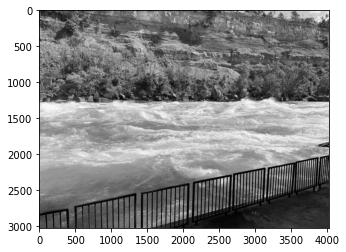

In [ ]:
plt.imshow(greyscale(imgs[3]), cmap="gray")

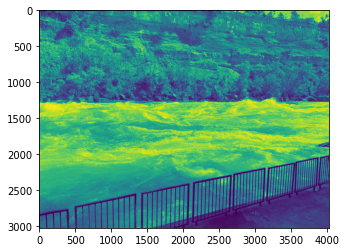

In [ ]:
# green only in picture in 4D matrix
plt.imshow(stack[:,:,1,0])

Misty Water Effect Greyscale

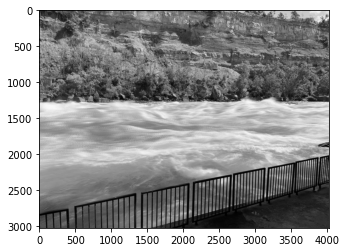

In [ ]:
# Misty Water Effect shortcut
grey_mean = grey_stack.mean(axis=2)
plt.imshow(grey_mean, cmap="gray")

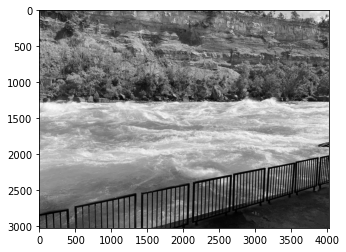

In [ ]:
plt.imshow(grey_stack[:,:,0], cmap="gray")

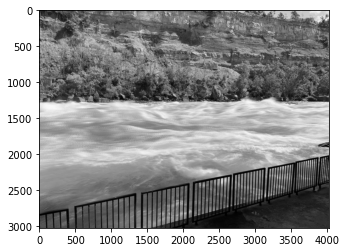

In [ ]:
# Misty Water Effect Max shortcut
grey_max = grey_stack.max(axis=2)
plt.imshow(grey_mean, cmap="gray")

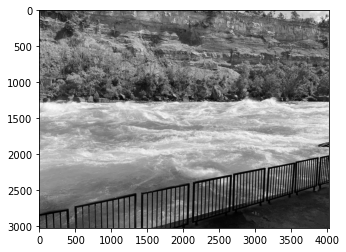

In [ ]:
plt.imshow(grey_stack[:,:,0], cmap="gray")

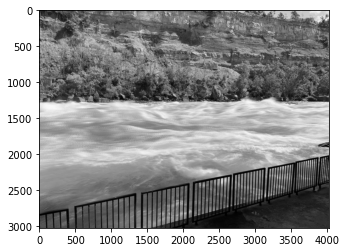

In [ ]:
# Misty Water Effect Min shortcut
grey_min = grey_stack.min(axis=2)
plt.imshow(grey_mean, cmap="gray")

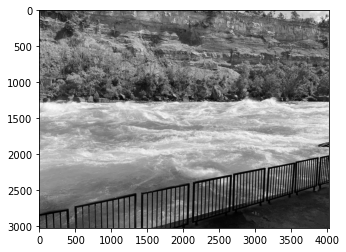

In [ ]:
plt.imshow(grey_stack[:,:,0], cmap="gray")

(-0.5, 4031.5, 3023.5, -0.5)

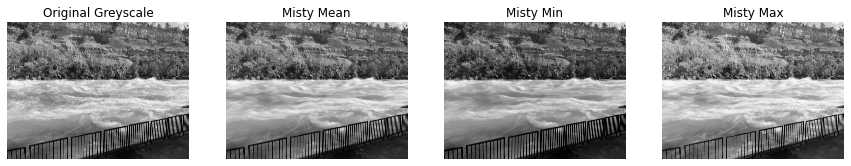

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=[15, 4])
ax1.set_title("Original Greyscale")
ax2.set_title("Misty Mean")
ax3.set_title("Misty Min")
ax4.set_title("Misty Max")

im1 = ax1.imshow(grey_stack[:,:,0], cmap="gray")
im2 = ax2.imshow(grey_mean, cmap="gray")
im3 = ax3.imshow(grey_min, cmap="gray")
im4 = ax4.imshow(grey_max, cmap="gray")

ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax4.axis('off')

In [ ]:
def misty_rgb(imgs, mode="max"):
  """
  Calculates max, min, mean misty water effect for rgb images, depending on the mode.

  Input:
    imgs: 4D np array of rgb images
    modes: "max", "min", "mean"
  
  Output:
    3D np array depending on the mode desired
  """
  # Step 1: Figure out the dimensions of the output image
  x, y, r, i = imgs.shape
  # Step 2: Make an empty output image 3D matrix
  out = np.zeros((x, y, r), dtype=np.uint8)
  # Step 3: 
  if mode == "max":
    out[:,:,0] = imgs[:,:,0,:].max(axis=2)
    out[:,:,1] = imgs[:,:,1,:].max(axis=2)
    out[:,:,2] = imgs[:,:,2,:].max(axis=2)
    return out
  elif mode == "min":
    out[:,:,0] = imgs[:,:,0,:].min(axis=2)
    out[:,:,1] = imgs[:,:,1,:].min(axis=2)
    out[:,:,2] = imgs[:,:,2,:].min(axis=2)
    return out
  elif mode == "mean":
    out[:,:,0]= imgs[:,:,0,:].mean(axis=2)
    out[:,:,1] = imgs[:,:,1,:].mean(axis=2)
    out[:,:,2] = imgs[:,:,2,:].mean(axis=2)
    return out
  else:
    return "Error: Inputed mode is not a option"

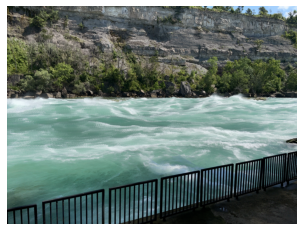

In [ ]:
min = misty_rgb(stack, "min")
plt.axis('off')
plt.imshow(min)


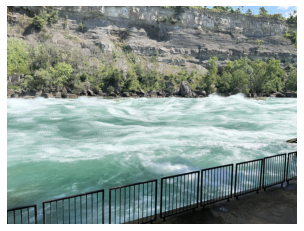

In [ ]:
max = misty_rgb(stack, "max")
plt.axis('off')
plt.imshow(max)

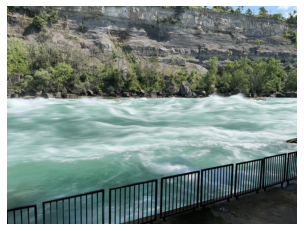

In [ ]:
mean = misty_rgb(stack, "mean")
plt.axis('off')
plt.imshow(mean)

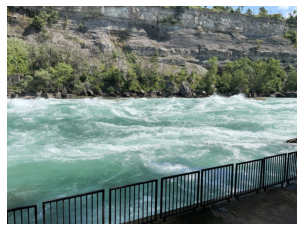

In [ ]:
plt.axis('off')
plt.imshow(stack[:,:,:,0])

(-0.5, 4031.5, 3023.5, -0.5)

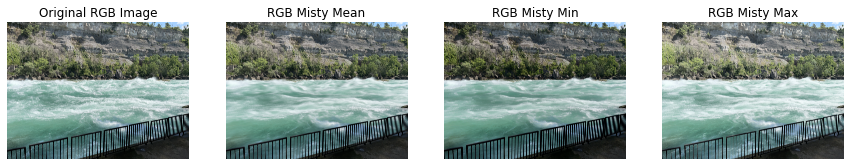

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=[15, 4])
ax1.set_title("Original RGB Image")
ax2.set_title("RGB Misty Mean")
ax3.set_title("RGB Misty Min")
ax4.set_title("RGB Misty Max")

im1 = ax1.imshow(stack[:,:,:,0])
im2 = ax2.imshow(mean)
im3 = ax3.imshow(min)
im4 = ax4.imshow(max)

ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax4.axis('off')

In [ ]:
print(mean.dtype)

uint8
